In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from matplotlib.colors import SymLogNorm, Normalize

In [2]:
orig_bg = fits.open('/tmp/histo.fits')[0].data

In [3]:
new_bg = fits.open('/tmp/sim11_r_ng_background.fits')[0].data
new_bg[new_bg < -1e30] = np.nan

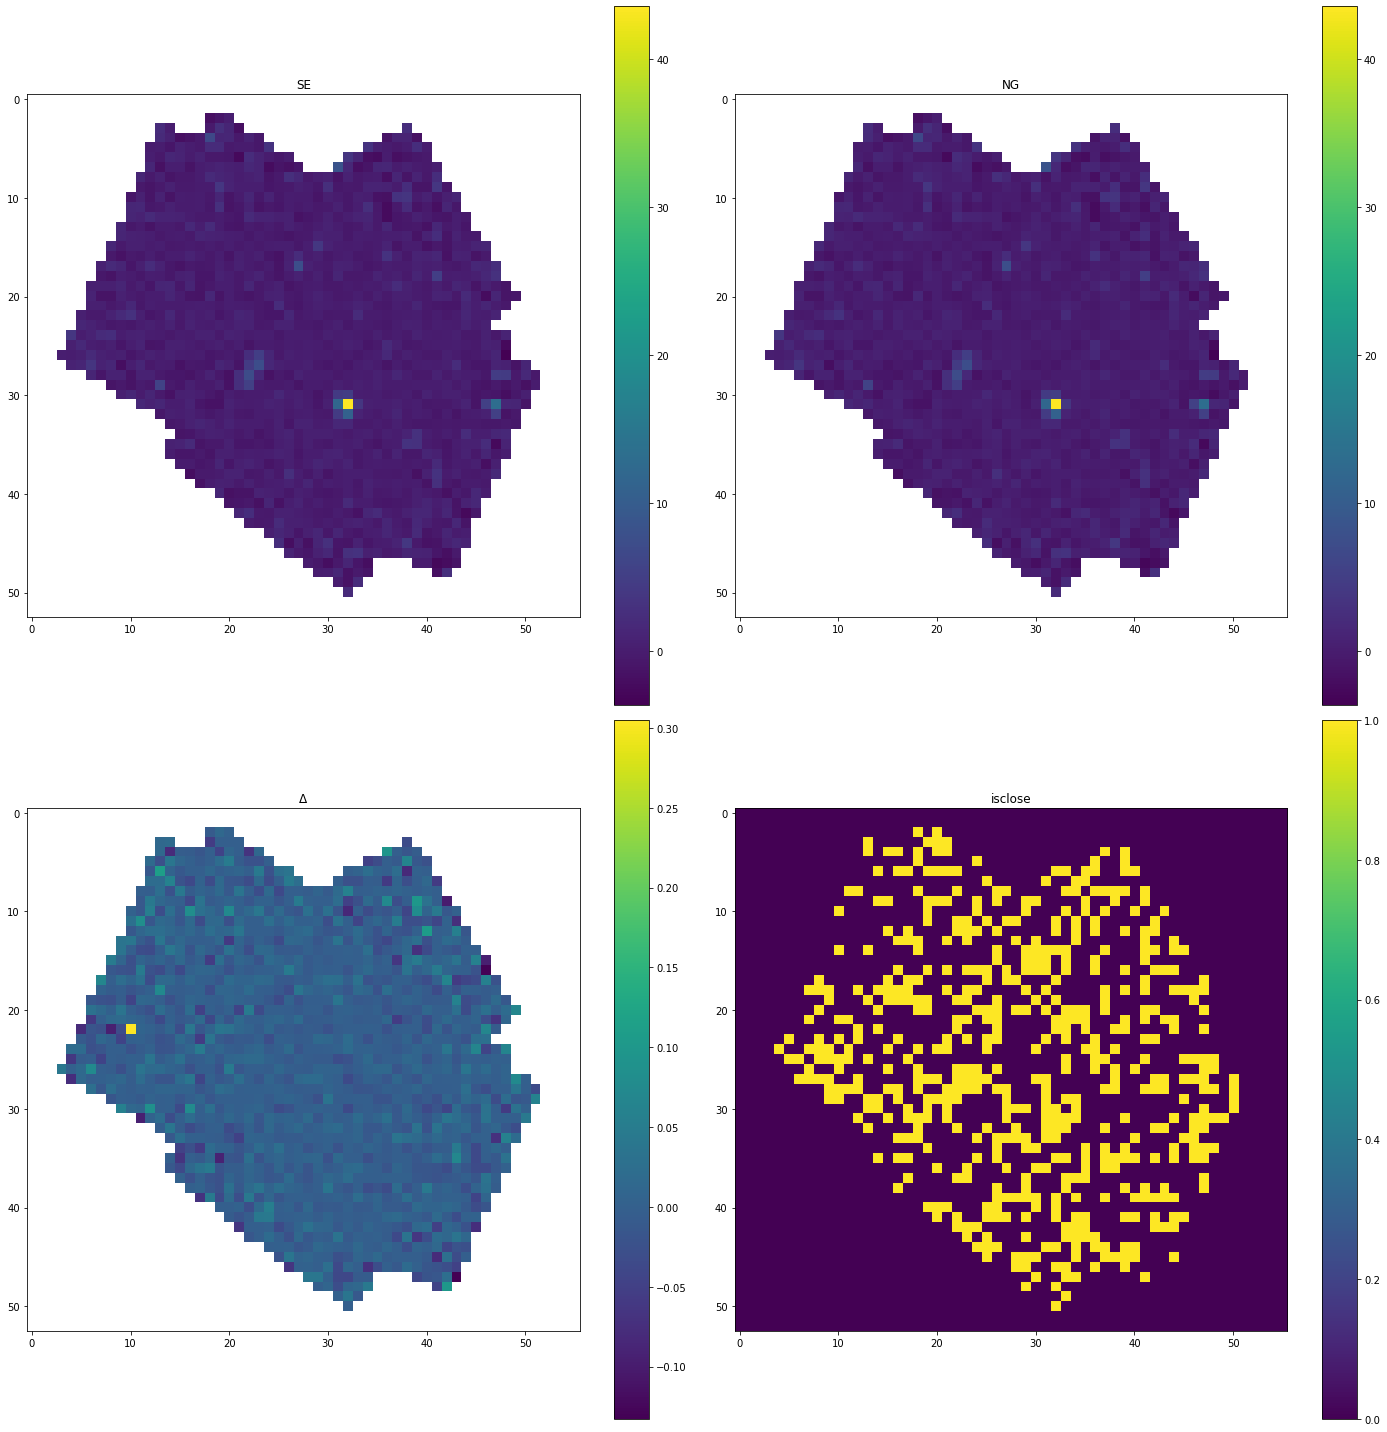

In [4]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(20,20))

axes[0, 0].set_title('SE')
im1 = axes[0, 0].imshow(orig_bg)
plt.colorbar(im1, ax=axes[0, 0])

axes[0, 1].set_title('NG')
im2 = axes[0, 1].imshow(new_bg)
plt.colorbar(im2, ax=axes[0, 1])

axes[1, 0].set_title('$\Delta$')
diff = new_bg - orig_bg
df = axes[1, 0].imshow(diff)
plt.colorbar(df, ax=axes[1, 0])

axes[1, 1].set_title('isclose')
close = axes[1, 1].imshow(np.isclose(orig_bg, new_bg, rtol=1e-2).astype(np.int))
plt.colorbar(close, ax=axes[1, 1])

plt.tight_layout()
plt.show()

In [5]:
np.nansum(np.abs(diff))

23.669756

In [6]:
orig_var = np.sqrt(fits.open('/tmp/var.fits')[0].data)

In [7]:
new_var = fits.open('/tmp/sim11_r_ng_variance.fits')[0].data
new_var[new_var > 1e30] = np.nan

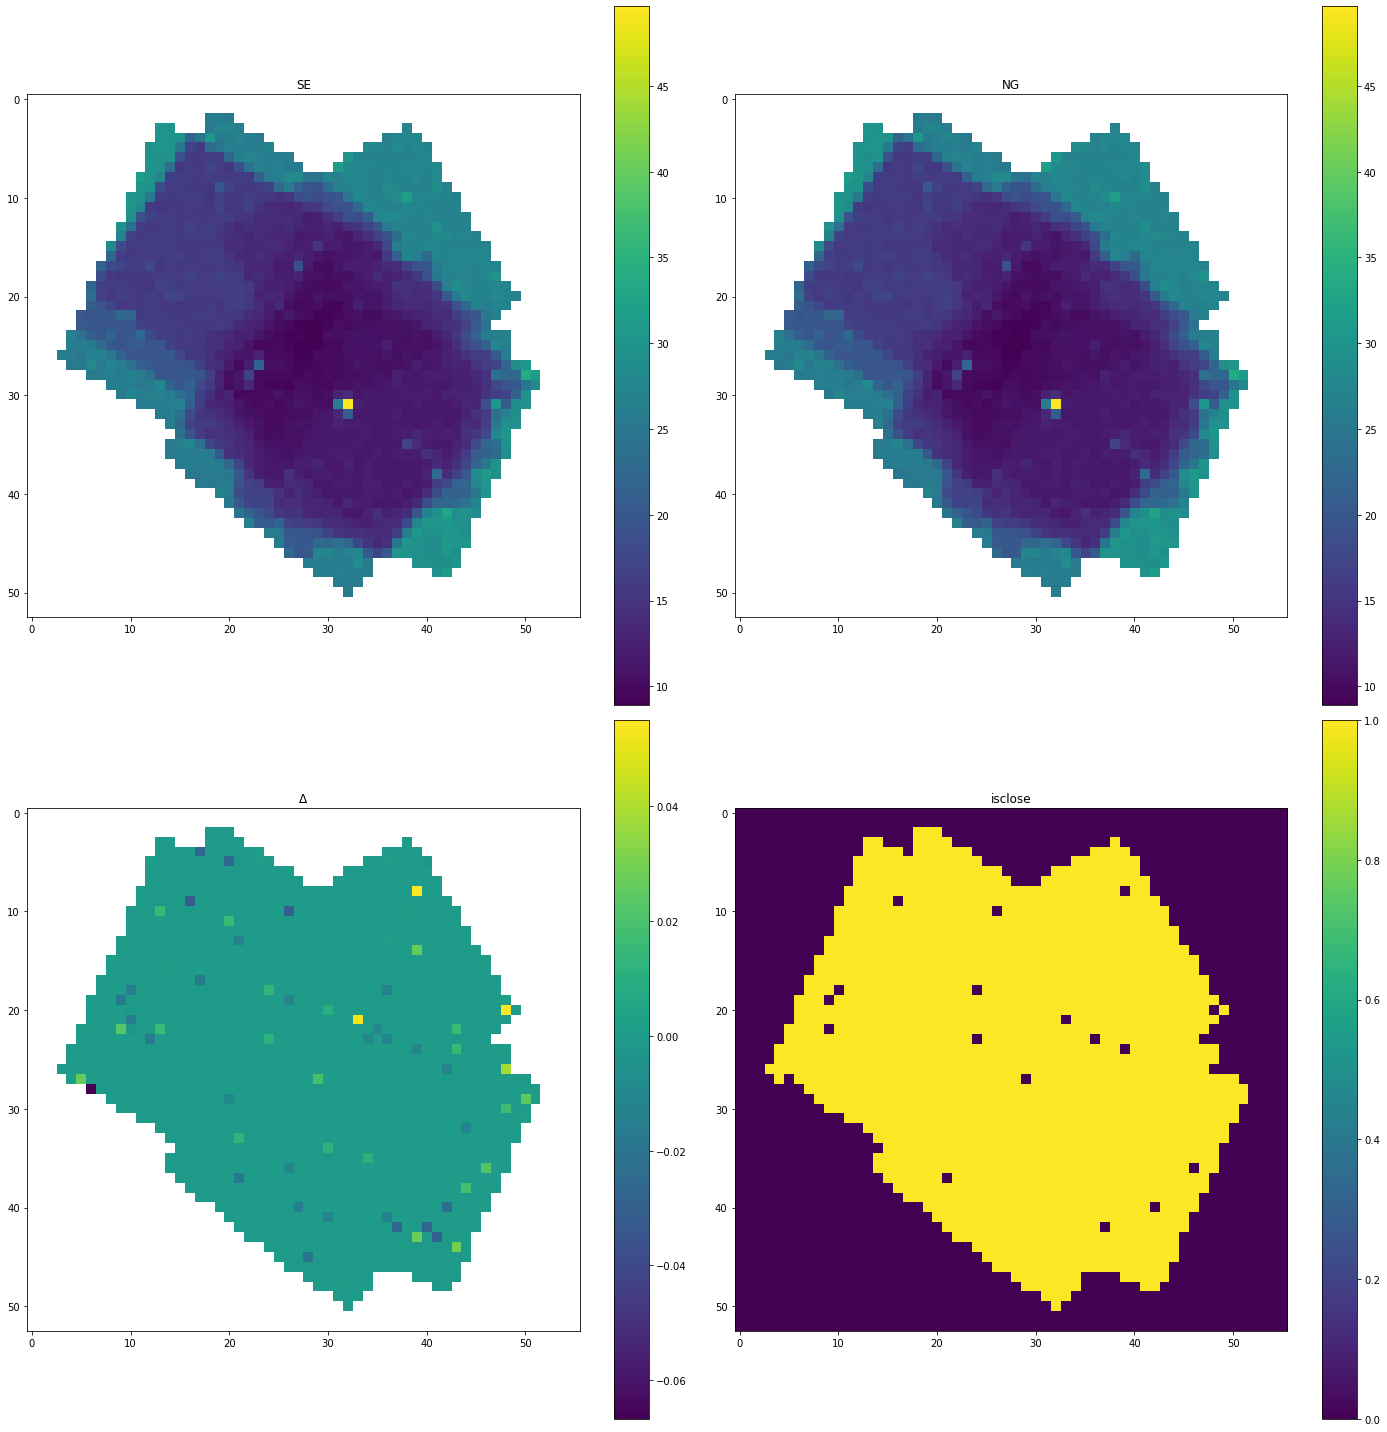

In [12]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(20,20))

axes[0, 0].set_title('SE')
im1 = axes[0, 0].imshow(orig_var)
plt.colorbar(im1, ax=axes[0, 0])

axes[0, 1].set_title('NG')
im2 = axes[0, 1].imshow(new_var)
plt.colorbar(im2, ax=axes[0, 1])

axes[1, 0].set_title('$\Delta$')
diff = new_var - orig_var
df = axes[1, 0].imshow(diff)
plt.colorbar(df, ax=axes[1, 0])

axes[1, 1].set_title('isclose')
close = axes[1, 1].imshow(np.isclose(new_var, orig_var, 1e-3).astype(np.int))
plt.colorbar(close, ax=axes[1, 1])

plt.tight_layout()
plt.show()

In [11]:
np.nansum(np.abs(diff))

1.4454088